In [3]:
from langgraph.graph import Graph

In [10]:
# Initialize the Graph workflow

workflow=Graph()

In [11]:
# Define Node

def Fun1_node(input1):
    return input1+" is my name"

def Fun2_node(input2):
    return input2+"  and I am a huge fan of MS Dhoni"


In [12]:
workflow.add_node("Fun1",Fun1_node)
workflow.add_node("Fun2",Fun2_node)

In [13]:
workflow.add_edge("Fun1","Fun2")

In [ ]:
workflow.set_entry_point("Fun1") # Setting up Starting point of the node
workflow.set_finish_point("Fun2") # Setting up Finish point of the node

In [15]:
app=workflow.compile()

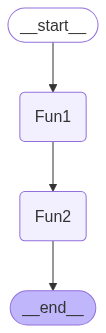

In [16]:
app

In [17]:
app.invoke("Prasad")

'Prasad is my name  and I am a huge fan of MS Dhoni'

In [18]:
for output in app.stream("Prasad"):
    for key,value in output.items():
        print(key,value)
        print("---------------------")

Fun1 Prasad is my name
---------------------
Fun2 Prasad is my name  and I am a huge fan of MS Dhoni
---------------------


In [24]:
app.stream("Prasad")

<generator object Pregel.stream at 0x000002E097680F40>

In [21]:
for node in app.stream("Prasad"):
    for key,value in node.items():
        print(f"{value} ---> is the output from : {key}")
        print("---------------------")

Prasad is my name ---> is the output from : Fun1
---------------------
Prasad is my name  and I am a huge fan of MS Dhoni ---> is the output from : Fun2
---------------------


#### Let's build a Langraph, which will go a fetch a details about top 2 topic of the subject and  provides answers

In [32]:
from langchain_groq import ChatGroq
from pprint import pprint

In [ ]:
llm_model=ChatGroq(model="llama-3.1-8b-instant",temperature=0.7) # invoke free llama model through Groq interface


AIMessage(content="I'm functioning properly, thanks for asking. I'm a large language model, so I don't have emotions like humans do, but I'm here and ready to help with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 41, 'total_tokens': 92, 'completion_time': 0.068, 'prompt_time': 0.002070773, 'queue_time': 0.049582497, 'total_time': 0.070070773}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--c71b33b5-4505-4f33-863b-43facc5beef2-0', usage_metadata={'input_tokens': 41, 'output_tokens': 51, 'total_tokens': 92})

In [97]:
def Topic_generator(subject):
    response=llm_model.invoke(f"Hi, Generate 2 main topics in {subject}, the output should be just words separated by ',' without any additional text")
    results=response.content.split(",")
    print(results)
    return results


In [102]:
def description_generator(results):
    for topic in results:
        topic_desc=llm_model.invoke(f"Hi, Generate 100 words about {topic}, the output should be only related to this mentioned topic")
        pprint(topic_desc.content)
        print("____________________________")
        


In [111]:
workflow2=Graph()

workflow2.add_node("Topic Generator",Topic_generator)
workflow2.add_node("Description Generator",description_generator)

workflow2.add_edge("Topic Generator","Description Generator")

workflow2.set_entry_point("Topic Generator")
workflow2.set_finish_point("Description Generator")


In [112]:
app2=workflow2.compile()

In [109]:
for node in app2.stream("Physics"):
    for key,value in node.items():
        print("Top 2 topics in Physics:")

['Mechanics', 'Electromagnetism']
Top 2 topics in Physics:
('Mechanics is a branch of physics that deals with the study of motion and its '
 'causes. It involves the analysis of forces, energy, and momentum in order to '
 'understand how objects move and respond to different conditions. There are '
 'two main types of mechanics: kinematics, which focuses on the description of '
 'motion, and dynamics, which studies the causes of motion. Mechanics is '
 'applied in various fields, including engineering, robotics, and computer '
 'simulations. It provides the foundation for understanding many everyday '
 'phenomena, such as the motion of vehicles, the behavior of electrical '
 'systems, and the performance of mechanical devices.')
____________________________
('Electromagnetism is a fundamental physical phenomenon that describes the '
 'interaction between electricity and magnetism. It is a fundamental force of '
 'nature that governs the behavior of charged particles and is responsible 

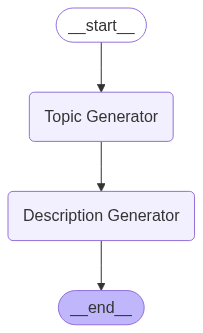

In [113]:
app2